# Homework 1: Regression (50 points)

**Reading**: Textbook chapter [15](https://www.inferentialthinking.com/chapters/15/Prediction).

**Pandas Cheat Sheet**: There are several Pandas documentation files you can find with a simple search. This is one that is short and informative: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 1 is due Tuesday, 1/22 at 9:30am. Late work will not be accepted.  

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 1. Amazon River Data (12 points) ##

The data below give the high and low water levels of the Amazon River at Iquitos, Peru (in meters). 

In the 1970s roads were first opened into the upper Amazon area, allowing for large-scale deforestation. This in turn may cause major climatological and hydrological changes, since rainfall and runoff are likely to be affected.

The data from 1962 to 1969 may be thought of as a control period while 1970 to 1978 represent values obtained after the beginning of development. The goal is to analyze these data to determine if deforestation has resulted in changes in the water balance of the Amazon basin.

In [3]:
amazon_df=pd.read_csv("amazon.csv")
amazon_df

,Year,High,Low
0,1962,25.82,18.24
1,1963,25.35,16.50
2,1964,24.29,20.26
3,1965,24.05,20.97
4,1966,24.89,19.43
5,1967,25.35,19.31
6,1968,25.23,20.85
7,1969,25.06,19.54
8,1970,27.13,20.49
9,1971,27.36,21.91


#### Question 1

Draw scatter plots of High versus Year, Low versus Year and High versus Low. Use more than one cell if needed.

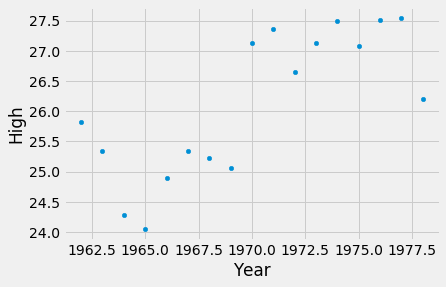

In [4]:
# code here and in additional cells if needed
highyear = amazon_df.plot.scatter(x='Year',y='High')
highyear



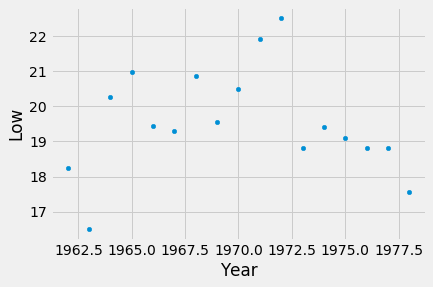

In [5]:
lowyear = amazon_df.plot.scatter(x='Year',y='Low')
lowyear


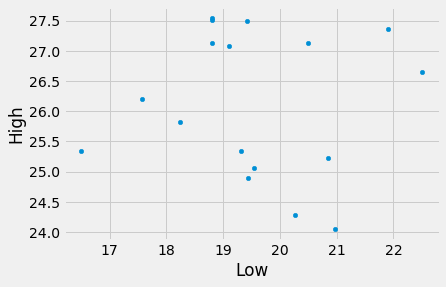

In [6]:
highlow = amazon_df.plot.scatter(x='Low',y='High')
highlow


#### Question 2

Calculate the regression (least squares) lines for High versus Year, Low versus Year and High versus Low. Interpret the slopes in tersms of the problem.

In [7]:
# High vs Year least squares
def yearhigh_mse(any_slope, any_intercept):
    x = amazon_df['Year']
    y = amazon_df['High']
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) 

minimize(yearhigh_mse)

array([ 0.01326498, -0.00408459])

For every increase in year (1 year), we expect the high water level to be 0.013 meters higher on average. 

In [8]:
# Low vs Year least squares
def yearlow_mse(any_slope, any_intercept):
    x = amazon_df['Year']
    y = amazon_df['Low']
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) 

minimize(yearlow_mse)

array([0.00992842, 0.00043421])

For every increase in year (1 year), we expect the low water level to be 0.009 meters higher on average.

In [9]:
# High vs Low least squares
def lowhigh_mse(any_slope, any_intercept):
    x = amazon_df['Low']
    y = amazon_df['High']
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) 

minimize(lowhigh_mse)

array([-1.40595883e-02,  2.64008796e+01])

For every one meter increase in the low water level, we expect the high water level to be -.0014 meters lower on average. 

#### Question 3
On the basis of this data, can we say that deforestation is causing changes in the water level in the Amazon? What additional information, if available, might be used to infer causality?

We cannot say that deforestation is causing changes in the water level. While it may be true, there are many other factors that could also be influencing or causing the changes in water level including changes in population, transportation pollution, and more. We would need information on the surrounding environment throughout the years to account for as many of the other potential causes as possible. 

## 2. Triple Jump Distances vs. Vertical Jump Heights (15 points)

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (an horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data into a pandas data frame.


In [12]:
jumps_df = pd.read_csv('triple_vertical.csv')
jumps_df.head(9)

,triple,vertical
0,383.00,33.00
1,781.00,71.10
2,561.62,62.25
3,624.52,61.33
4,446.24,40.19
5,515.30,38.96
6,449.22,39.69
7,560.91,46.51
8,519.12,37.68


#### Question 1
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows: (i) the least squares line; and (ii) the least absolute deviations line**.  

In [23]:
# answer to Question 1 here and in additional cells if needed
def line_mse(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    def mse(any_slope, any_intercept):
        estimate = any_slope*x + any_intercept
        return (np.mean((y - estimate) ** 2)) 
    return minimize(mse) 

line_mse(jumps_df['triple'], jumps_df['vertical'])



array([ 0.09082004, -0.28371359])

In [24]:
def line_mae(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    def mae(any_slope, any_intercept):
        estimate = any_slope*x + any_intercept
        return (np.mean(abs(y - estimate))) 
    return minimize(mae) 

line_mae(jumps_df['triple'], jumps_df['vertical'])


array([ 0.09910922, -4.83302533])

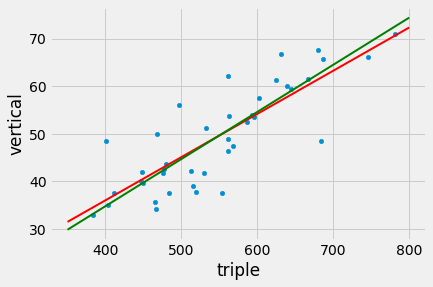

In [22]:
plot = jumps_df.plot.scatter('triple', 'vertical')
xlims = np.array([350, 800])
plots.plot(xlims, 0.09082004 * xlims - 0.28371359, lw=2,color='red') ##least squares
plots.plot(xlims, 0.09910922 * xlims - 4.83302533, lw=2,color='green') ##least absolute deviations


#### Question 2
Based on the scatterplot, does the correlation coefficient `r` look closest to 0, .5, or -.5? Explain. 

It looks closest to 0.5. A correlation coeffecient of 0 indicates there is likely no relationship, yet here, we have a linear line. We know it is positive as the linear relationship appears to be positive where as x increases, so does y.

#### Question 3
Create a function called `regression_parameters`. It takes as its argument a data frame with two columns.  The first column is the x-axis, and the second column is the y-axis.  It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line.

In [37]:
def regression_parameters(df):
    x = df['triple']
    y = df['vertical']
    
    def mse(any_slope, any_intercept):
        estimate = any_slope*x + any_intercept
        return (np.mean((y - estimate) ** 2)) 
    info_array = minimize(mse)
    
    r = info_array[0] * (np.std(x)/np.std(y))
    slope = info_array[0]
    intercept = info_array[1]
    return make_array(r, slope, intercept)

parameters = regression_parameters(jumps_df)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8151256059157199 ; slope: 0.09082004246076382 ; intercept: -0.28371358941200886


#### Question 4
Let's use `parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [41]:
triple_record_vert_est = (18.29*100*parameters.item(1)) - parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 166.393571 centimeters


#### Question 5
Do you expect this estimate to be accurate within a few centimeters? Why or why not?


I do not expect the estimate to be fairly accurate. Although there is a demonstrated correlation between triple and vertical jumps, evidenced by our decently high r value of 0.815, the world record that we are predicting for is likely outside the data we have. So, it would be an extrapolation to use our regression equation to predict a value outside of what it was calculated for.

If we can assume that the relationship and high value remain around the same at extreme values, then the accurate would likely be fairly accurate.

## 3. Cryptocurrencies (23 points)##

Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable crpytocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attatched to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** 

There is a larger datset on [Kaggle](https://www.kaggle.com/jessevent/all-crypto-currencies/data) from which we obtained two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [42]:
btc_df=pd.read_csv('btc.csv')
btc_df.head(10)

,date,open,close,market,day
0,2015-09-29,239.02,236.69,3505090000,1
1,2015-09-30,236.64,236.06,3471280000,2
2,2015-10-01,236.00,237.55,3462800000,3
3,2015-10-02,237.26,237.29,3482190000,4
4,2015-10-03,237.20,238.73,3482100000,5
5,2015-10-04,238.53,238.26,3502460000,6
6,2015-10-05,238.15,240.38,3497740000,7
7,2015-10-06,240.36,246.06,3531230000,8
8,2015-10-07,246.17,242.97,3617400000,9
9,2015-10-08,243.07,242.30,3572730000,10


In [43]:
eth_df=pd.read_csv('eth.csv')
eth_df.head(10)

,date,open,close,market,day
0,2015-09-29,0.579414,0.661146,42607700,1
1,2015-09-30,0.661192,0.738644,48636600,2
2,2015-10-01,0.734307,0.690215,54032300,3
3,2015-10-02,0.683732,0.678574,50328700,4
4,2015-10-03,0.678783,0.687171,49981900,5
5,2015-10-04,0.686343,0.668379,50556000,6
6,2015-10-05,0.666784,0.628643,49131600,7
7,2015-10-06,0.622218,0.650645,45863300,8
8,2015-10-07,0.650515,0.609388,47964700,9
9,2015-10-08,0.609501,0.621716,44955900,10


#### Question 1

In some of the questions below, we will need to pair the daily 'btc' and 'eth' price data. A simple way is to use the corresponding columns in the two data frames (assuming that they correspond to the same dates). Verify that the rows in the two data frames correspond to the same dates. You can see this for the first 10 observations by looking at the date columns above.



In [74]:
for i in range(len(btc_df)):
    if btc_df.iloc[[i]]['date'].all() == eth_df.iloc[[i]]['date'].all():
        print('all match')
        break


all match



#### Question 2

In the cell below, make one or two plots to investigate the opening prices of BTC and ETH as a function of time. Then comment on whether you think the values are correlated.

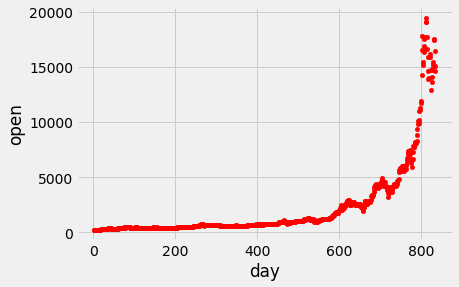

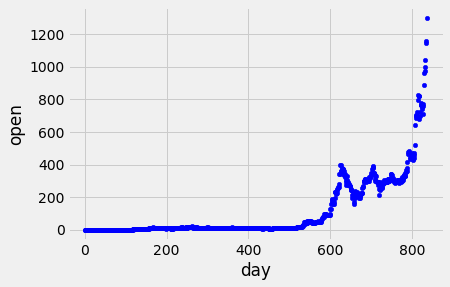

In [79]:
btc_df.plot.scatter('day', 'open', color='red')
eth_df.plot.scatter('day', 'open', color='blue')
# xlims = np.array([350, 800])
# plots.plot(xlims, 0.09082004 * xlims - 0.28371359, lw=2,color='red') ##least squares
# plots.plot(xlims, 0.09910922 * xlims - 4.83302533, lw=2,color='green') ##least absolute deviations

The values between time (day) and opening price (open) do seem to be correlated, although not linearly. There appears to be a potential exponential relationship.

The values between opening prices for eth and btc do seem to be related as they have a very familiar shape. But, when we look at the graph below, there does not seem to be a clear linear pattern. Perhaps an logarithmic pattern for lower prices but high uncertainty for higher prices.

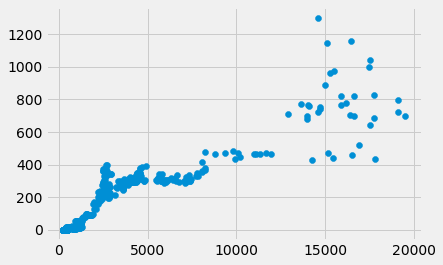

In [104]:
plots.scatter(btc_df['open'], eth_df['open'])

# plots.scatter(galton_df['midparentHeight'],galton_df['childHeight'])


#### Question 3

Now, calculate the correlation coefficient between the opening prices of BTC and ETH.

In [98]:
x = eth_df['open']
y = btc_df['open']

def mse(any_slope, any_intercept):
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) 
info_array = minimize(mse)

r = info_array[0] * (np.std(x)/np.std(y))
r


0.9250325762688221

#### Question 4
Regardless of your conclusions above, write a function `eth_predictor` which takes an opening BTC price and predicts the price of ETH. Again, it will be helpful to use the function `regression_parameters` that you defined earlier in this homework.

In [148]:
def regression_parameters_crypto(eth_df, btc_df):
    x = btc_df['open']
    y = eth_df['open']
    
    def mse(any_slope, any_intercept):
        estimate = any_slope*x + any_intercept
        return (np.mean((y - estimate) ** 2)) 
    info_array = minimize(mse)
    
    r = info_array[0] * (np.std(x)/np.std(y))
    slope = info_array[0]
    intercept = info_array[1]
    return make_array(r, slope, intercept)

regression_parameters_crypto(eth_df, btc_df)

array([0.92503258, 0.05037151, 2.13844063])

In [153]:
def eth_predictor(btc_price):
    parameters = regression_parameters_crypto(eth_df, btc_df)
    slope = parameters.item(1)
    intercept = parameters.item(2)
    return int(btc_price*slope) + intercept

eth_predictor(10000)

505.1384406338634

#### Question 5

Now, using the `eth_predictor` you defined in the previous question, make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices should be different from the color for the predicted ETH prices.

Hints:
* An example of such a scatter plot is generated <a href= "https://www.inferentialthinking.com/chapters/15/2/regression-line.html
"> here. </a>
* Think about the table or data frame that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present? Also, what should each row represent? Constructing the table or data frame will be the main part of this question; once you have this, generating the scatter plot should be straightforward as usual.

In [154]:
# btc_orig, eth_orig, eth_pred
preds = []

for e in btc_df['open']:
    preds.append(eth_predictor(e))
preds


[14.138440633863398,
 13.138440633863398,
 13.138440633863398,
 13.138440633863398,
 13.138440633863398,
 14.138440633863398,
 13.138440633863398,
 14.138440633863398,
 14.138440633863398,
 14.138440633863398,
 14.138440633863398,
 14.138440633863398,
 14.138440633863398,
 14.138440633863398,
 14.138440633863398,
 14.138440633863398,
 14.138440633863398,
 14.138440633863398,
 15.138440633863398,
 15.138440633863398,
 15.138440633863398,
 15.138440633863398,
 15.138440633863398,
 15.138440633863398,
 15.138440633863398,
 15.138440633863398,
 16.138440633863397,
 16.138440633863397,
 16.138440633863397,
 16.138440633863397,
 17.138440633863397,
 17.138440633863397,
 18.138440633863397,
 17.138440633863397,
 18.138440633863397,
 20.138440633863397,
 22.138440633863397,
 22.138440633863397,
 21.138440633863397,
 20.138440633863397,
 21.138440633863397,
 20.138440633863397,
 21.138440633863397,
 19.138440633863397,
 17.138440633863397,
 19.138440633863397,
 18.138440633863397,
 18.138440633

In [155]:
df = pd.DataFrame()

df['btc original'] = btc_df['open']
df['eth original'] = eth_df['open']
df['eth prediction'] = preds

df.head()

,btc original,eth original,eth prediction
0,239.02,0.579414,14.138441
1,236.64,0.661192,13.138441
2,236.00,0.734307,13.138441
3,237.26,0.683732,13.138441
4,237.20,0.678783,13.138441


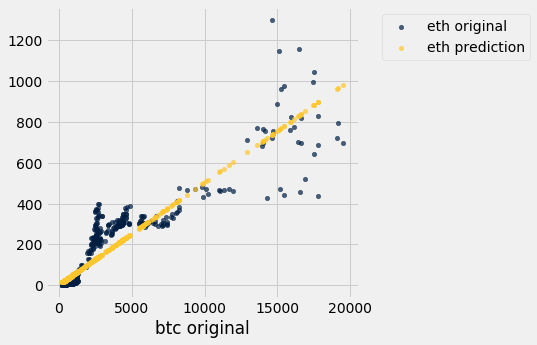

In [156]:
plotinfo = Table.from_df(df)
plotinfo.scatter('btc original')


#### Question 6
For what values of BTC should you be more confident of your predictions? Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features make this model reasonable? If not, what features make it unreasonable?

You can be more confident of your predictions for lower levels of btc, under 2,500 approximately. The model we used is not reasonable because the shape of the scatter plot of the true data is not linear, and we tried to fit a linear model to it.

#### Question 7

Now suppose you want to go the other way: to predict a BTC  price given an ETH price. What would the regression parameters of this linear model be? How do they compare to the regression parameters from the model where you were predicting ETH price given a BTC price? Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `regression_parameters` changes when switching BTC and ETH as $x$ and $y$. For example, if r changes, the slope changes, but the intercept wouldn't change, the array would be `[True, True, False]`

In [157]:
regression_changes = [False, True, True]
regression_changes

[False, True, True]